In [22]:
import pandas as pd
import plotly.express as pl

In [23]:
NY = pd.read_csv('AB_NYC_2019.csv')
NY.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [41]:
import json
fig3 

In [24]:
missing_values = NY.isnull().sum()
print("missing values in each column:")
print(missing_values)


missing values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [25]:
cleaned = NY.dropna(subset=['name', 'host_name', 'last_review', 'reviews_per_month'])
cleaned

id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
5            Chris           Manhattan      Murray Hill  40.74767  -73.97500   
...            ...                 ...              ...       ...        ...   
48782        Rusaa           Manhattan  Upper East Side  40.78099  -73.95366   
48790         H Ai              Queens         Flushing  40.75104  -73.81459   
48799          Ben       Staten Island      Great Kills  40.54179  -74.14275   
48805       Blaine               Bronx       Mott Haven  40.80787  -73.92400   
48852    Christine            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
5      Entire home/apt    200               3                 74  2019-06-22   
...                ...    ...             ...                ...         ...   
48782     Private room    129               1                  1  2019-07-07   
48790     Private room     45               1                  1  2019-07-07   
48799     Private room    235               1                  1  2019-07-07   
48805  Entire home/apt    100               1                  2  2019-07-07   
48852     Private room     30               1                  1  2019-07-08   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
3                   4.64                               1               194  
4                   0.10                               1                 0  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48782               1.00                               1               147  
48790               1.00                               6               339  
48799               1.00                               1                87  
48805               2.00                               1                40  
48852               1.00                               1                 1  

[38821 rows x 16 columns]

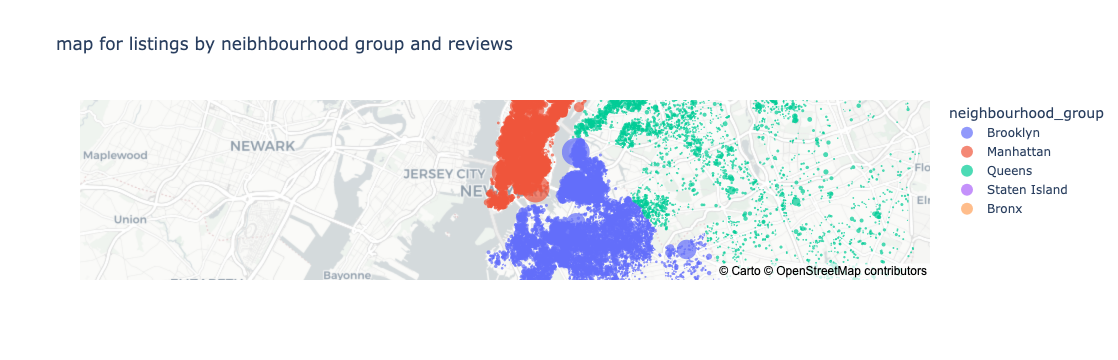

In [26]:
fig = pl.scatter_mapbox(cleaned, lat='latitude', lon='longitude', color = 'neighbourhood_group', size = 'price', 
                        title = 'map for listings by neibhbourhood group and reviews',
center = {'lat':40.7128, 'lon':-74.0060},
mapbox_style = "carto-positron",
zoom=10)
fig.show()

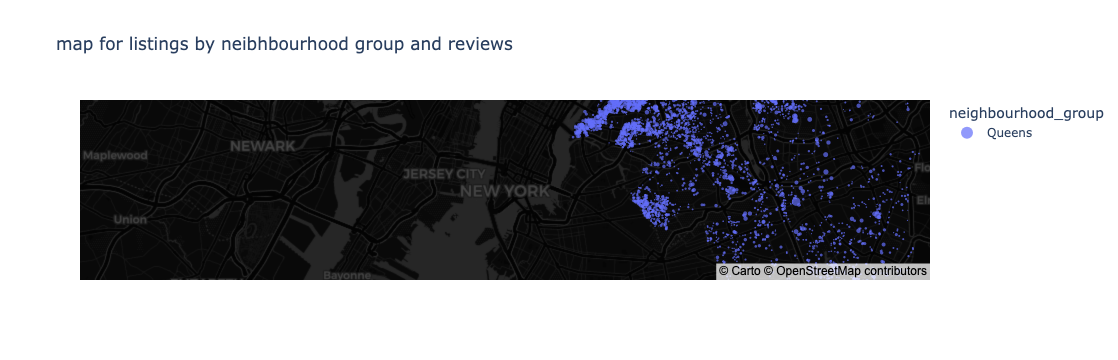

In [37]:
df_queens = cleaned[cleaned['neighbourhood_group']=='Queens']

fig = pl.scatter_mapbox(df_queens, lat='latitude', lon='longitude', color = 'neighbourhood_group', size = 'price', 
                        title = 'map for listings by neibhbourhood group and reviews',
center = {'lat':40.7128, 'lon':-74.0060},
mapbox_style = "carto-darkmatter",
zoom=10)
fig.show()



In [40]:
def create_map_for_room_type(room_type):
    df_room_type = df_queens[df_queens['room_type']==room_type]
    fig= pl.scatter_mapbox(
        df_room_type,
        lat='latitude',
        lon='longitude',
        color='neighbourhood',
        size='price',
        hover_name='name',
        hover_data={
        'price':True,
        'room_type':True,
        'number_of_reviews':True,
        'availability_365':True
        },
        title=f'map of{room_type}s in Queens by neighbourhood and price',
        mapbox_style="catro-darkmatter",
        center = {'lat':40.7128, 'lon':-74.0060},
        zoom=10,
        size_max=15
    )
    fig.show()

room_types=df_queens['room_type'].unique()

for room_type in room_types:
    create_map_for_room_type(room_type)
    